In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [49]:
import tensorflow as tf

# TensorFlow version: 2.16.1

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


In [26]:
df = pd.read_csv('auto-mpg.csv')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
187,17.5,8,305.0,140,4215,13.0,76,1,chevrolet chevelle malibu classic
74,13.0,8,302.0,140,4294,16.0,72,1,ford gran torino (sw)
109,21.0,4,140.0,72,2401,19.5,73,1,chevrolet vega
127,19.0,6,232.0,100,2901,16.0,74,1,amc hornet
251,20.2,8,302.0,139,3570,12.8,78,1,mercury monarch ghia
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
234,24.5,4,151.0,88,2740,16.0,77,1,pontiac sunbird coupe
78,21.0,4,120.0,87,2979,19.5,72,2,peugeot 504 (sw)
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
43,13.0,8,400.0,170,4746,12.0,71,1,ford country squire (sw)


In [27]:
df.shape

(398, 9)

In [28]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [29]:
df = df.drop("car name", axis = 1)

In [30]:
df["origin"] = df["origin"].replace(1, "america")
df["origin"] = df["origin"].replace(2, "europe")
df["origin"] = df["origin"].replace(3, "asia")

In [31]:
df["horsepower"] = df["horsepower"].replace("?", np.nan)
df["horsepower"] = df["horsepower"].astype(float)

horsepower_median = df["horsepower"].median()
horsepower_median
df["horsepower"] = df["horsepower"].replace(np.nan, horsepower_median)

In [32]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [33]:
# Convery dtype of origin to encoded format
df = pd.get_dummies(df, columns = ["origin"])

In [34]:
df.shape

(398, 10)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assigned X and Y
X = df.drop("mpg", axis = 1)
Y = df[["mpg"]]

# Split train test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

model = Sequential()

# Assuming X_train is your existing data
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float')
X_test = X_test.astype(np.float32)
Y_test = Y_test.astype(np.float32)


# Units is number of neurons
# Adding input layer
# input_dim is number of independent variables
model.add(Dense(units = 300, activation = "relu", input_dim = 9, kernel_initializer='uniform'))
# Adding hidden layers (Hidden Layers includes input layer but input_dim is passed for input)
model.add(Dense(units = 20, activation = "relu", kernel_initializer='uniform'))
model.add(Dense(units = 20, activation = "relu", kernel_initializer='uniform'))
model.add(Dense(units = 20, activation = "relu", kernel_initializer='uniform'))
model.add(Dense(units = 20, activation = "relu", kernel_initializer='uniform'))
model.add(Dense(units = 20, activation = "relu", kernel_initializer='uniform'))
# Adding output layer
# For multi class use softmax for binary use sigmoid
model.add(Dense(units = 1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(X_train, Y_train, batch_size = 10, epochs = 10)

Epoch 1/10
28/28 [==============================] - 1s 2ms/step - loss: 573.2391
Epoch 2/10
28/28 [==============================] - 0s 2ms/step - loss: 233.4732
Epoch 3/10
28/28 [==============================] - 0s 2ms/step - loss: 180.2693
Epoch 4/10
28/28 [==============================] - 0s 2ms/step - loss: 177.0329
Epoch 5/10
28/28 [==============================] - 0s 2ms/step - loss: 176.2258
Epoch 6/10
28/28 [==============================] - 0s 2ms/step - loss: 172.7181
Epoch 7/10
28/28 [==============================] - 0s 2ms/step - loss: 167.8677
Epoch 8/10
28/28 [==============================] - 0s 2ms/step - loss: 161.9881
Epoch 9/10
28/28 [==============================] - 0s 2ms/step - loss: 156.2274
Epoch 10/10
28/28 [==============================] - 0s 2ms/step - loss: 152.9334


In [37]:
from sklearn.metrics import r2_score
Y_pred = model.predict(X_train)
r2_score(Y_train, Y_pred)

9/9 [==============================] - 0s 1ms/step


-1.3207215868139555

In [38]:
from sklearn.metrics import r2_score
Y_pred = model.predict(X_test)
r2_score(Y_test, Y_pred)

4/4 [==============================] - 0s 1ms/step


-1.318223133834468

In [ ]:
# Define the columns for boxplots
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
           'acceleration', 'model year']

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes for easier iteration
axes_flat = axes.flatten()

# Loop through each column and plot on each subplot
for i, column in enumerate(columns):
    sns.boxplot(x=column, data=df, ax=axes_flat[i])
    axes_flat[i].set_title(f'Boxplot of {column}', fontsize=14)
    axes_flat[i].set_xlabel(column, fontsize=12)

# Remove any remaining subplots if there are fewer than 9 columns
for j in range(len(columns), len(axes_flat)):
    axes_flat[j].remove()

plt.tight_layout()
plt.show()

In [ ]:
# Standardization Approach
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

In [ ]:
# Standardization for all numerical columns
df["mpg"] = std_scale.fit_transform(df[["mpg"]])
df["cylinders"] = std_scale.fit_transform(df[["cylinders"]])
df["displacement"] = std_scale.fit_transform(df[["displacement"]])
df["horsepower"] = std_scale.fit_transform(df[["horsepower"]])
df["weight"] = std_scale.fit_transform(df[["weight"]])
df["acceleration"] = std_scale.fit_transform(df[["acceleration"]])
df["model year"] = std_scale.fit_transform(df[["model year"]])

In [40]:
def remove_outliers(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range, upper_range

In [41]:
lower_range, upper_range = remove_outliers(df['mpg'])
df['mpg'] = np.where(df['mpg'] > upper_range, upper_range, df['mpg'])
df['mpg'] = np.where(df['mpg'] < lower_range, lower_range, df['mpg'])

In [42]:
lower_range, upper_range = remove_outliers(df['horsepower'])
df['horsepower'] = np.where(df['horsepower'] > upper_range, upper_range, df['horsepower'])
df['horsepower'] = np.where(df['horsepower'] < lower_range, lower_range, df['horsepower'])

In [43]:
lower_range, upper_range = remove_outliers(df['acceleration'])
df['acceleration'] = np.where(df['acceleration'] > upper_range, upper_range, df['acceleration'])
df['acceleration'] = np.where(df['acceleration'] < lower_range, lower_range, df['acceleration'])

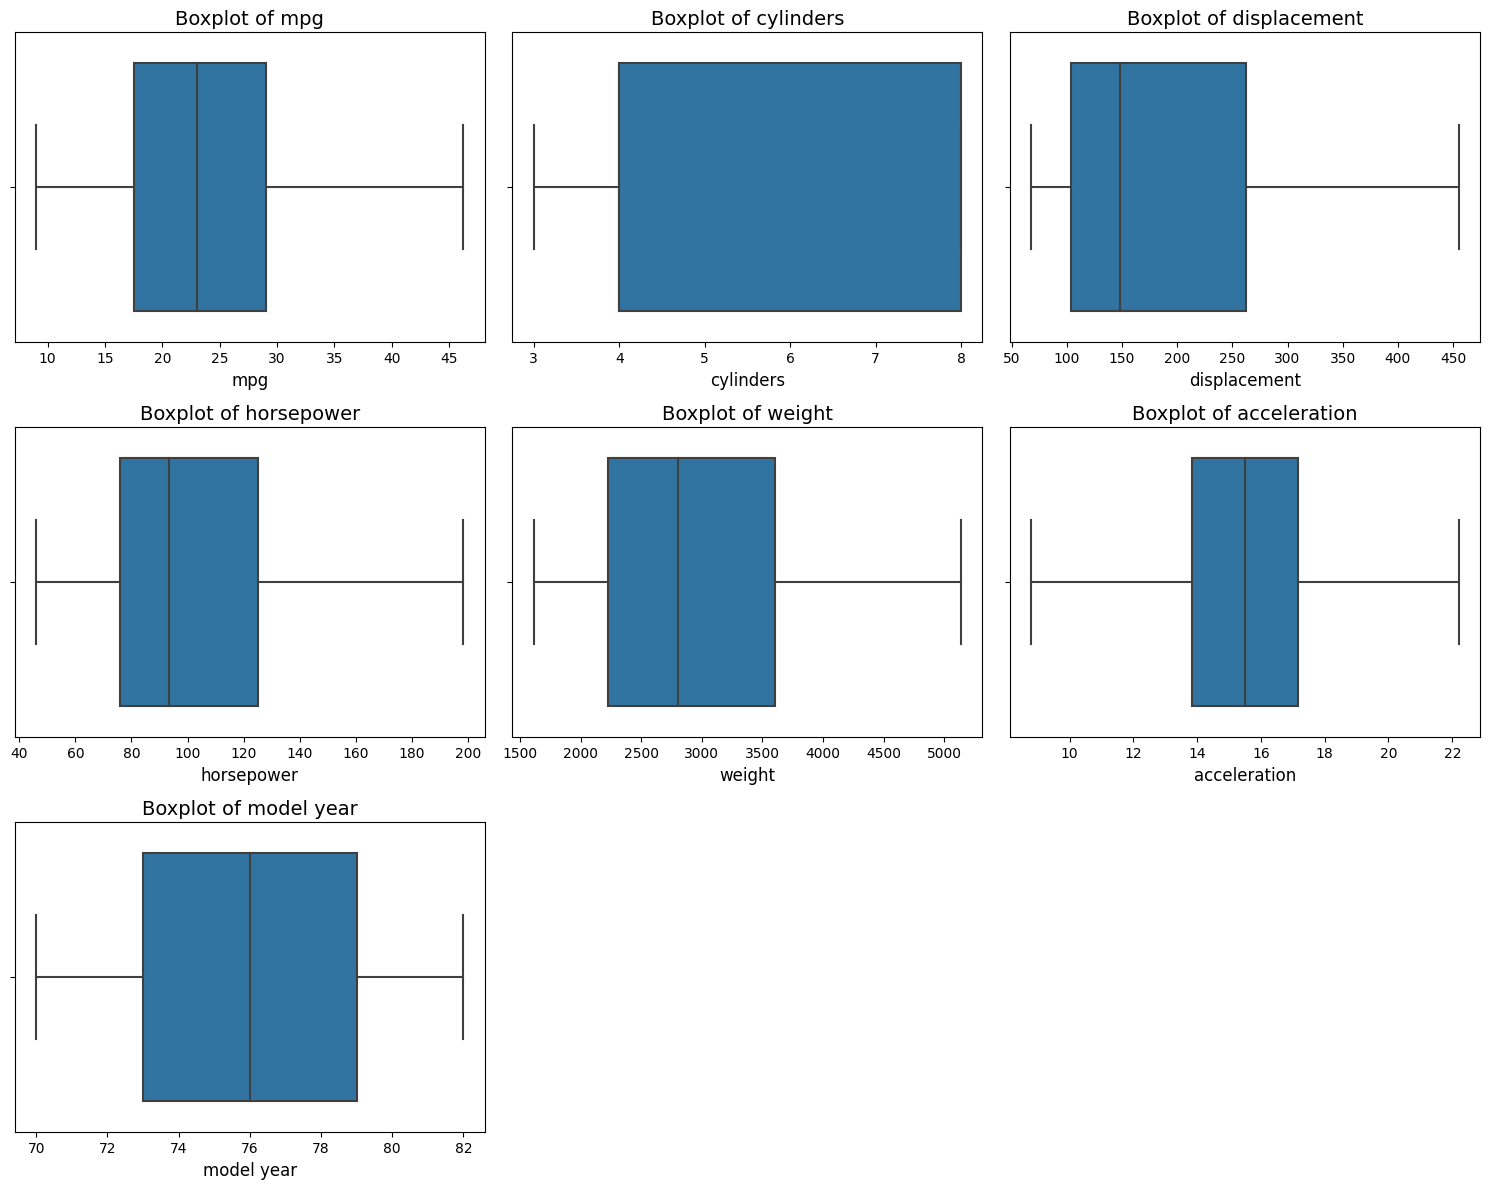

In [44]:
# Define the columns for boxplots
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
           'acceleration', 'model year']

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes for easier iteration
axes_flat = axes.flatten()

# Loop through each column and plot on each subplot
for i, column in enumerate(columns):
    sns.boxplot(x=column, data=df, ax=axes_flat[i])
    axes_flat[i].set_title(f'Boxplot of {column}', fontsize=14)
    axes_flat[i].set_xlabel(column, fontsize=12)

# Remove any remaining subplots if there are fewer than 9 columns
for j in range(len(columns), len(axes_flat)):
    axes_flat[j].remove()

plt.tight_layout()
plt.show()

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [46]:
# Assigned X and Y
X = df.drop("mpg", axis = 1)
Y = df[["mpg"]]

# Split train test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
X_train = X_train.astype(np.float32)
Y_train = Y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
Y_test = Y_test.astype(np.float32)

model = Sequential()

# Units is number of neurons
# Adding input layer
# input_dim is number of independent variables
model.add(Dense(units = 75, activation = "relu", input_dim = 9, kernel_initializer='uniform'))
# Adding hidden layers (Hidden Layers includes input layer but input_dim is passed for input)
model.add(Dropout(0.3))
model.add(Dense(units = 100, activation = "relu", kernel_initializer='uniform'))
model.add(Dropout(0.3))
model.add(Dense(units = 80, activation = "relu", kernel_initializer='uniform'))
model.add(Dropout(0.3))
model.add(Dense(units = 20, activation = "relu", kernel_initializer='uniform'))
# Adding output layer
# For multi class use softmax for binary use sigmoid
model.add(Dropout(0.3))
model.add(Dense(units = 1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(X_train, Y_train, batch_size = 100, epochs = 500)

Epoch 1/500
3/3 [==============================] - 1s 3ms/step - loss: 612.2740
Epoch 2/500
3/3 [==============================] - 0s 3ms/step - loss: 509.5528
Epoch 3/500
3/3 [==============================] - 0s 5ms/step - loss: 336.7463
Epoch 4/500
3/3 [==============================] - 0s 3ms/step - loss: 266.3202
Epoch 5/500
3/3 [==============================] - 0s 4ms/step - loss: 315.3960
Epoch 6/500
3/3 [==============================] - 0s 4ms/step - loss: 225.3490
Epoch 7/500
3/3 [==============================] - 0s 5ms/step - loss: 249.2910
Epoch 8/500
3/3 [==============================] - 0s 4ms/step - loss: 253.2429
Epoch 9/500
3/3 [==============================] - 0s 4ms/step - loss: 236.3740
Epoch 10/500
3/3 [==============================] - 0s 4ms/step - loss: 217.8938
Epoch 11/500
3/3 [==============================] - 0s 4ms/step - loss: 238.0472
Epoch 12/500
3/3 [==============================] - 0s 4ms/step - loss: 227.5859
Epoch 13/500
3/3 [===================

3/3 [==============================] - 0s 3ms/step - loss: 68.8194
Epoch 104/500
3/3 [==============================] - 0s 4ms/step - loss: 63.3780
Epoch 105/500
3/3 [==============================] - 0s 4ms/step - loss: 57.2644
Epoch 106/500
3/3 [==============================] - 0s 4ms/step - loss: 62.9027
Epoch 107/500
3/3 [==============================] - 0s 3ms/step - loss: 64.4495
Epoch 108/500
3/3 [==============================] - 0s 3ms/step - loss: 54.7271
Epoch 109/500
3/3 [==============================] - 0s 3ms/step - loss: 54.8903
Epoch 110/500
3/3 [==============================] - 0s 3ms/step - loss: 59.3241
Epoch 111/500
3/3 [==============================] - 0s 3ms/step - loss: 61.5656
Epoch 112/500
3/3 [==============================] - 0s 3ms/step - loss: 63.0689
Epoch 113/500
3/3 [==============================] - 0s 3ms/step - loss: 54.9175
Epoch 114/500
3/3 [==============================] - 0s 3ms/step - loss: 49.6156
Epoch 115/500
3/3 [=======================

3/3 [==============================] - 0s 4ms/step - loss: 53.1963
Epoch 205/500
3/3 [==============================] - 0s 2ms/step - loss: 48.2438
Epoch 206/500
3/3 [==============================] - 0s 4ms/step - loss: 40.4184
Epoch 207/500
3/3 [==============================] - 0s 3ms/step - loss: 53.9351
Epoch 208/500
3/3 [==============================] - 0s 3ms/step - loss: 52.4182
Epoch 209/500
3/3 [==============================] - 0s 3ms/step - loss: 44.7553
Epoch 210/500
3/3 [==============================] - 0s 3ms/step - loss: 43.3255
Epoch 211/500
3/3 [==============================] - 0s 3ms/step - loss: 51.7049
Epoch 212/500
3/3 [==============================] - 0s 3ms/step - loss: 44.4309
Epoch 213/500
3/3 [==============================] - 0s 3ms/step - loss: 51.6367
Epoch 214/500
3/3 [==============================] - 0s 3ms/step - loss: 54.7661
Epoch 215/500
3/3 [==============================] - 0s 3ms/step - loss: 49.3431
Epoch 216/500
3/3 [=======================

3/3 [==============================] - 0s 4ms/step - loss: 50.1730
Epoch 306/500
3/3 [==============================] - 0s 3ms/step - loss: 56.4706
Epoch 307/500
3/3 [==============================] - 0s 3ms/step - loss: 52.7710
Epoch 308/500
3/3 [==============================] - 0s 2ms/step - loss: 47.4690
Epoch 309/500
3/3 [==============================] - 0s 3ms/step - loss: 44.9324
Epoch 310/500
3/3 [==============================] - 0s 3ms/step - loss: 62.2696
Epoch 311/500
3/3 [==============================] - 0s 3ms/step - loss: 44.4729
Epoch 312/500
3/3 [==============================] - 0s 3ms/step - loss: 51.2038
Epoch 313/500
3/3 [==============================] - 0s 3ms/step - loss: 45.5615
Epoch 314/500
3/3 [==============================] - 0s 3ms/step - loss: 43.1150
Epoch 315/500
3/3 [==============================] - 0s 3ms/step - loss: 46.3348
Epoch 316/500
3/3 [==============================] - 0s 3ms/step - loss: 41.9729
Epoch 317/500
3/3 [=======================

3/3 [==============================] - 0s 3ms/step - loss: 43.2672
Epoch 407/500
3/3 [==============================] - 0s 3ms/step - loss: 43.4319
Epoch 408/500
3/3 [==============================] - 0s 3ms/step - loss: 43.7711
Epoch 409/500
3/3 [==============================] - 0s 4ms/step - loss: 47.0408
Epoch 410/500
3/3 [==============================] - 0s 3ms/step - loss: 51.3892
Epoch 411/500
3/3 [==============================] - 0s 3ms/step - loss: 51.0409
Epoch 412/500
3/3 [==============================] - 0s 4ms/step - loss: 42.1059
Epoch 413/500
3/3 [==============================] - 0s 4ms/step - loss: 42.4117
Epoch 414/500
3/3 [==============================] - 0s 4ms/step - loss: 47.2945
Epoch 415/500
3/3 [==============================] - 0s 4ms/step - loss: 43.1410
Epoch 416/500
3/3 [==============================] - 0s 4ms/step - loss: 48.4629
Epoch 417/500
3/3 [==============================] - 0s 3ms/step - loss: 44.7137
Epoch 418/500
3/3 [=======================

In [47]:
from sklearn.metrics import r2_score
Y_pred = model.predict(X_train)
r2_score(Y_train, Y_pred)

9/9 [==============================] - 0s 1ms/step


0.5011233318571364

In [48]:
from sklearn.metrics import r2_score
Y_pred = model.predict(X_test)
r2_score(Y_test, Y_pred)

4/4 [==============================] - 0s 2ms/step


0.5230792761101614